# <center> Построение адаптивных моделей в statsmodels </center>

<div class="alert alert-warning">

<h3> Домашнее задание</h3>    
    
<ul>1. Определите наилучшую адаптивную модель прогнозирования. Для этого загрузите данные и отобразите их на графике. Есть ли в ряде тренд, сезонность?</ul>
    
<ul>2. С помощью библиотеки statsmodels обучите выбранную модель и постройте прогноз. Отобразите результат на графике.</ul>
    
<ul>3. Вычислите среднеквадратичную ошибку для оценки качества аппроксимации.</ul>
<p></p>
  
</div>

In [1]:
import numpy as np
import pandas as pd
from pandas import datetime

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\41BC~1\AppData\Local\Temp/ipykernel_3540/2061560586.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
import statsmodels
statsmodels.__version__

'0.13.1'

In [10]:
mcs = pd.read_csv('C:/Users/79811/anaconda3/monthly-champagne-sales-in-1000s.csv', index_col="Month", parse_dates=True)

In [12]:
pd.to_datetime(mcs.index.map(lambda x: '200'+x))

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01', '2001-11-01', '2001-12-01',
               '2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01', '2002-11-01', '2002-12-01',
               '2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01', '2003-12-01',
               '2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01', '2004-11-01', '2004-12-01',
               '2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
      

In [15]:
mcs.index = pd.to_datetime(mcs.index.map(lambda x: '200'+x))

In [16]:
mcs.head()

,Monthly champagne sales (in 1000's) (p.273: Montgomery: Fore. & T.S.)
Month,
2001-01-01,2851
2001-02-01,2672
2001-03-01,2755
2001-04-01,2721
2001-05-01,2946


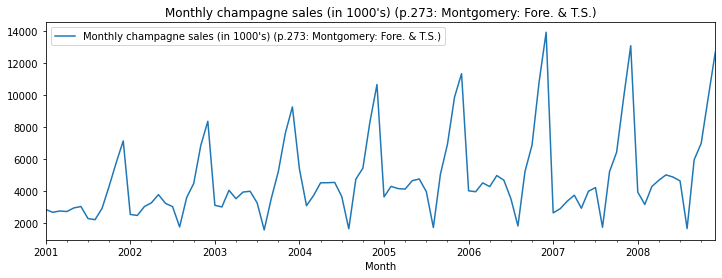

In [17]:
mcs.plot(figsize=(12,4))
plt.title("Monthly champagne sales (in 1000's) (p.273: Montgomery: Fore. & T.S.)")
plt.show()

В данном ряде присутствует сезонность, но тренда не наблюдается. Воспользуемся моделью Хольта-Уинтерса.

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [48]:
holt_winters = ExponentialSmoothing(mcs, initialization_method="estimated",  trend=None, seasonal="add").fit()

C:\Users\79811\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<Figure size 1800x600 with 0 Axes>

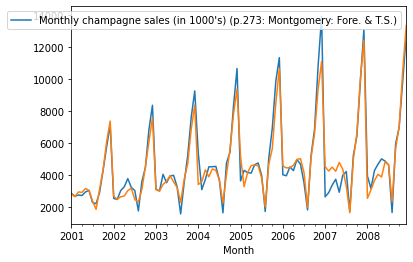

In [49]:
plt.figure(figsize=(12,4), dpi=150)
mcs.plot(label="True")
holt_winters.fittedvalues.plot(label="Holt-Winters")
plt.show()

Для построения прогноза воспользуемся методом .predict(start, end)

In [50]:
start = mcs.index[-1] + pd.DateOffset(month=1)
end = start + pd.DateOffset(month=9)
start, end

(Timestamp('2008-01-01 00:00:00'), Timestamp('2008-09-01 00:00:00'))

In [51]:
holt_winters_forecast = holt_winters.predict(start=start, end=end)

In [52]:
holt_winters_forecast

2008-01-01    2547.735103
2008-02-01    3070.439238
2008-03-01    3658.798171
2008-04-01    4044.081329
2008-05-01    3880.462810
2008-06-01    4817.754771
2008-07-01    4645.111242
2008-08-01    2333.756366
2008-09-01    5654.863564
Freq: MS, dtype: float64

<Figure size 1800x600 with 0 Axes>

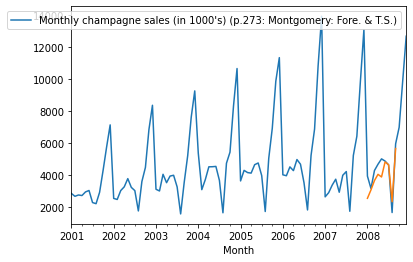

In [53]:
plt.figure(figsize=(12, 4), dpi=150)
mcs.plot()
holt_winters_forecast.plot()
plt.show()

Вычислим среднеквадратичную ошибку

In [26]:
from statsmodels.tools.eval_measures import mse

In [30]:
mcs1 = mcs["Monthly champagne sales (in 1000's) (p.273: Montgomery: Fore. & T.S.)"].values

In [33]:
mse(mcs1, (holt_winters.fittedvalues).values)

526012.3130166047